# PyTorch Computer Vision

https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

- [`torchvision`](https://docs.pytorch.org/vision/stable/index.html): base domain library for PyTorch CV
- `torchvision.datasets`: get datasets and data loading functions for computer vision here
- `torchvision.models`: get pretrained computer vision models that you can leverage for your own problems
- `torchvision.transforms`: functions for manipulating your vision data (images) to be suitable for use with an ML model

- `torch.utils.data.Dataset`: base dataset class for PyTorch
- `torch.utils.data.DataLoader`: creates a python iterable over a dataset

In [1]:
# import libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Getting a dataset

The dataset we'll be using is [FashionMNIST](https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#fashionmnist).

In [160]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=ToTensor(), # how do we want to transform the data? (img to tensor)a
    target_transform=None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Checking input and output shape

In [8]:
# check the shape of our image
print(f"Image shape: {image.shape} -> [colour channel, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [colour channel, height, width]
Image label: Ankle boot


### 1.2 Visualising our data

Image shape: torch.Size([1, 28, 28])


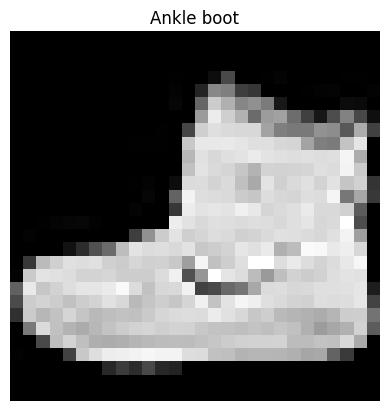

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

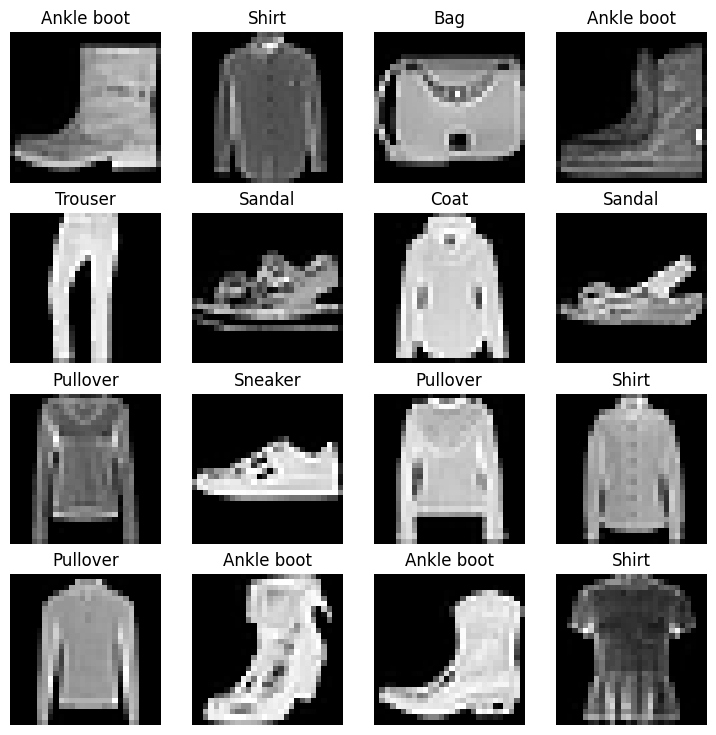

In [10]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [11]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into Python iterable.

More specifically we want to turn our data into batches (or mini-batches).

Why?:
1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

Read more about mini-batches.

In [161]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)  # it is better to compare when test data is not shuffled

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7852682326d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7852682f1610>)

In [162]:
# lets check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7852682326d0>, <torch.utils.data.dataloader.DataLoader object at 0x7852682f1610>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [163]:
# Check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features_batch.shape}")
print(f"Labels batch shape: {train_labels_batch.shape}")

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


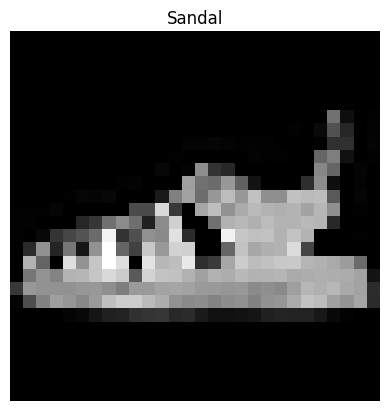

In [164]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Building a baseline model

When starting to build a series of machine learning modeling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words, start simply and add complexity when necessary.

In [16]:
# craete a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]
print(f"Shape before flattening: {x.shape} -> '[colour_channels, height, width]")

# flatten the sample
output = flatten_model(x)
print(f"Shape after flattening: {output.shape} -> vector space -> [clour_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> '[colour_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> vector space -> [clour_channels, height*width]


In [17]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x), model_0(dummy_x).shape # one logit per class

(tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
          -0.1004,  0.0157]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

In [20]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss function, optimiser and evaluation metrics

- Loss func: since we're working with multi-class data our loss function will be `nn.CrossEntropyLoss()`
- Optimizer: SGD
- Evalution metric: since we're working on a classification problem, let's use accuracy as our evaluation metric

In [21]:
import requests
from pathlib import Path

# download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn, plot_predictions, plot_decision_boundary

In [22]:
# import accuracy metric
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

2 main things you'll often want to track:
1. model's performance (loss, accuracy, etc.)
2. how fast it runs

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


3.640599999243932e-05

### 3.3 Creating a training loop and training a model on batches of data

1. loop through epochs
2. loop through training batches, perform training steps, calculate the train loss *per batch*
3. loop throuh the testing batches, perform testing steps, calculate the test loss *per batch*
4. print out what's happenin
5. time it out for fun

In [25]:
# import tqdm for progrss bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (keeping it small for faster training time)
epochs = 3

# create training an test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  ### training
  train_loss = 0
  # add a loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. forward pass
    y_pred = model_0(X)

    #2. Claculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

    # print
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # divide total train loss by length of train dataloader'
  train_loss /= len(train_dataloader)

  ### testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. forward pass
      test_pred = model_0(X_test)

      # 2. calculate loss and accuracy accumulatively
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # print
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 30.312 seconds


## 4. Make predictions and get baseline model results

In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)

      # accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# calculate model 0 results
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

In [28]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU(),
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=8,
                              output_shape=len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=10, bias=True)
    (4): ReLU()
  )
)

### 6.1 Setup loss, optimizer and evaluation metrics

In [29]:
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 6.2 Fuctionising the training and evaluation/testing loops

Let's create a function for:
- training loop: `train_step()`
- testing loop: `test_step()`

In [30]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs training with model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  model.train()

  # add a loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # put data on target device
    X, y = X.to(device), y.to(device)

    # 1. forward pass
    y_pred = model(X)

    #2. Claculate the loss n accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # logits -> pred labels

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    #5. optimizer step
    optimizer.step()

  # divide total train loss and acc by length of train dataloader'
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [31]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0, 0

  model.eval()

  # turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # put data on target device
      X, y = X.to(device), y.to(device)

      # 1. forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. calculate loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # logits -> pred labels

    # scale loss and acc to find the avg loss/acc per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [32]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
train_time_start_on_gpu = timer()

# set epovhs
epochs = 3

# create a optimisation and evaluation loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train loss: 0.91913 | Train acc: 66.24%
Test loss: 0.73198 | Test acc: 72.89%
Epoch: 1
----
Train loss: 0.61420 | Train acc: 77.61%
Test loss: 0.50056 | Test acc: 81.80%
Epoch: 2
----
Train loss: 0.46734 | Train acc: 83.34%
Test loss: 0.50745 | Test acc: 82.43%
Train time on cuda: 34.628 seconds


> **Note**: sometimes depending on your data/hardware, you might find that your model trains faster on CPU that GPU
>
> Why is this?
>
> 1. It could be that overhead for copying data/model to and from the GPU outweighs the compute benefots offered by the GPU.
> 2. The hardware you're using has better CPU in terms of compute capability than the GPU.
>
> For more on how to make your models compute faster, see here: https://horace.io/brrr_intro.html

In [33]:
# train time on cpu
total_train_time_model_0

30.312437339999974

In [34]:
# train time on gpu
total_train_time_model_1

34.62786829200002

In [35]:
# get model 1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [36]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # put data on target device
      X, y = X.to(device), y.to(device)

      # make predictions
      y_pred = model(X)

      # accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# calculate model 0 results
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.5074501037597656,
 'model_acc': 82.42811501597444}

In [37]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 7. Model 2: Building a Convolution Neural Network

CNN's are also known as ConvNets and are known for thir capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

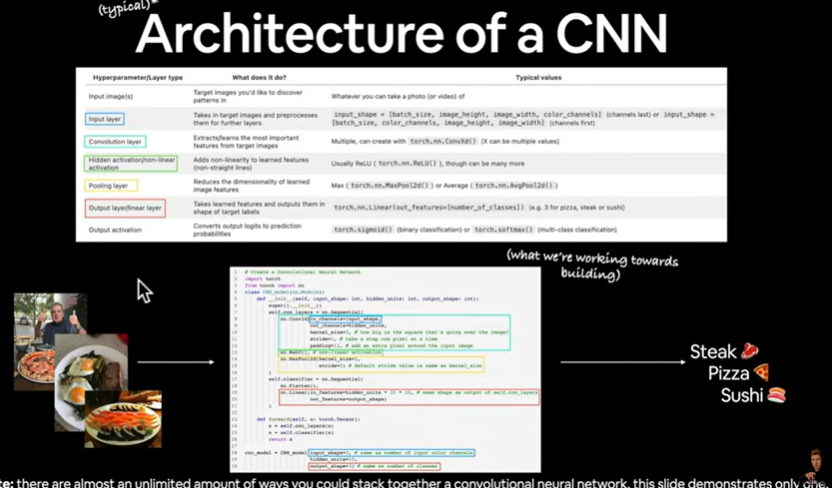

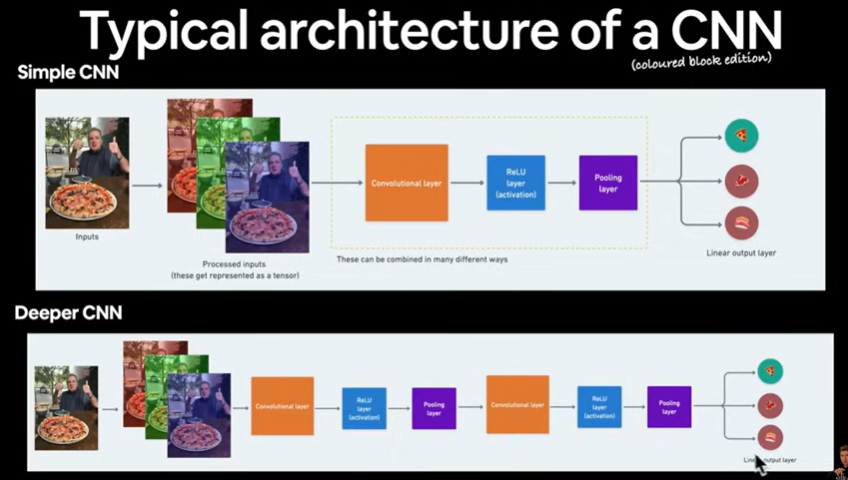

- [torch.nn.Conv2d](https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
- [torch.nn.MaxPool2d](https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)

In [165]:
# create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, # filter size
                  stride=1, # step size
                  padding=1), # add a row n coln (keep img size same)
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) # reduces the spatial dimensions of the feature maps (output of convolutional layers) while retaining important information
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # how 7 -> op = n+2p-k/s or just see the conv_block 2 shape below
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x


In [39]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # input channels is equal to no. of colour channels
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [40]:
# model.state_dict()

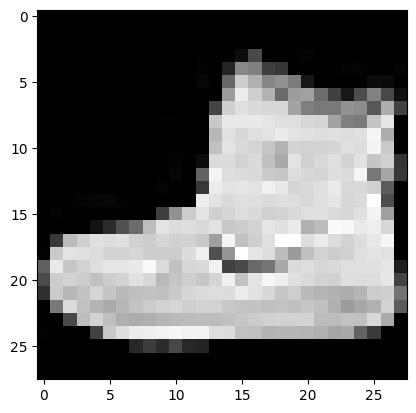

In [41]:
plt.imshow(image.squeeze(), cmap="gray");

In [42]:
image.shape

torch.Size([1, 28, 28])

In [43]:
image = image.to(device)
model_2(image.unsqueeze(0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [44]:
torch.manual_seed(42)

# create a batch of images
images = torch.rand(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0

In [45]:
torch.manual_seed(42)
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image.unsqueeze(dim=0))
# conv_output
print(f"Single conv2d layer output shape: {conv_output.shape}")

Single conv2d layer output shape: torch.Size([1, 10, 62, 62])


### 7.2 Stepping through `nn.MaxPool2d()`

In [46]:
test_image.shape

torch.Size([3, 64, 64])

In [47]:
# craete a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data just through the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# pass data through the max_pool_layer
test_image_through_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through max_pool_layer(): {test_image_through_pool.shape}") # /kernel_size

Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through max_pool_layer(): torch.Size([10, 31, 31])


In [48]:
torch.manual_seed(42)
# create a random tensor with a similar number of dimensions to our images
random_tensor = torch.rand(size=(1, 1, 2, 2))
print(f"Random tensor:\n {random_tensor}")
print(f"Random tensor shape:\n {random_tensor.shape}")

# create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through the max_pool_layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape:\n {max_pool_tensor.shape}")

Random tensor:
 tensor([[[[0.8823, 0.9150],
          [0.3829, 0.9593]]]])
Random tensor shape:
 torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.9593]]]])
Max pool tensor shape:
 torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model 2

In [49]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing model 2 using our training and testing functions

In [50]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
            device=device)
  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                              end=train_time_end_model_2,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.59568 | Train acc: 78.28%
Test loss: 0.38878 | Test acc: 86.09%
Train time on cuda: 13.566 seconds
Epoch: 1
-----
Train loss: 0.36069 | Train acc: 86.89%
Test loss: 0.35220 | Test acc: 87.26%
Train time on cuda: 26.529 seconds
Epoch: 2
-----
Train loss: 0.32318 | Train acc: 88.35%
Test loss: 0.32539 | Test acc: 88.53%
Train time on cuda: 39.318 seconds


In [166]:
# get model_2 results
model_2_results = eval_model(
    model = model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32538628578186035,
 'model_acc': 88.52835463258786}

## 8. Compare model results and training time

In [52]:
import pandas as pd
compare_result = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_result

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.507450,82.428115
2,FashionMNISTModelV2,0.325386,88.528355


In [53]:
# add training time to the result comparison
compare_result["Training time"] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]
compare_result

,model_name,model_loss,model_acc,Training time
0,FashionMNISTModelV0,0.476639,83.426518,30.312437
1,FashionMNISTModelV1,0.507450,82.428115,34.627868
2,FashionMNISTModelV2,0.325386,88.528355,39.318210


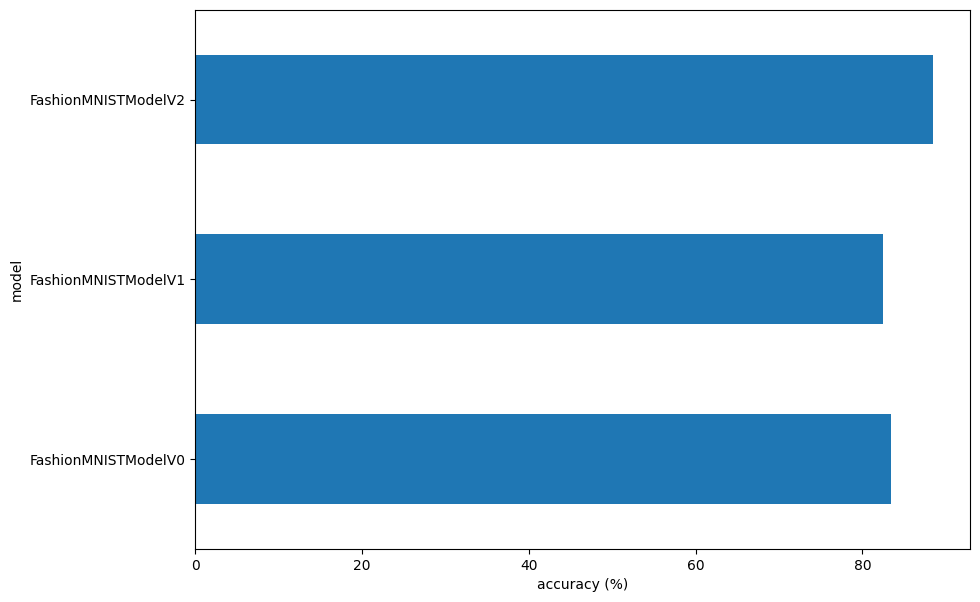

In [54]:
# Visualise or model results
plt.figure(figsize=(10, 7))
compare_result.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [55]:
def make_predictions(model: torch.nn.Module,
                       data: list,
                       device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # get pred probabilities (logit -> pred prob)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [168]:
import random
# random.seed(42)
test_sample = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_sample.append(sample)
  test_labels.append(label)

# view the first sample shape
test_sample[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

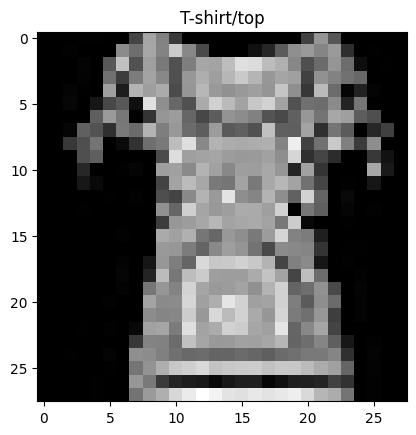

In [57]:
plt.imshow(test_sample[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [169]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_sample)

pred_probs[:10]

tensor([[2.9152e-02, 6.8033e-06, 9.0338e-03, 3.4424e-07, 2.1005e-03, 1.5363e-04,
         2.9172e-02, 2.1381e-04, 9.3011e-01, 6.0821e-05],
        [1.3334e-05, 1.4257e-06, 1.0304e-05, 7.5823e-06, 1.3093e-06, 3.5806e-02,
         3.7786e-06, 6.0287e-03, 9.5234e-05, 9.5803e-01],
        [3.8836e-02, 6.4369e-04, 8.9515e-01, 1.2525e-03, 8.1695e-03, 8.4915e-04,
         5.3038e-02, 1.3450e-04, 1.4863e-03, 4.3984e-04],
        [6.9413e-06, 1.1503e-05, 7.6705e-07, 2.9354e-06, 8.3523e-06, 3.9050e-02,
         1.6706e-04, 1.3340e-03, 1.4451e-03, 9.5797e-01],
        [7.0312e-03, 1.1732e-04, 9.1676e-01, 5.9381e-04, 1.0998e-02, 2.7689e-05,
         6.3927e-02, 9.0852e-06, 5.1169e-04, 2.3123e-05],
        [2.8891e-07, 1.0174e-07, 8.0889e-07, 1.1334e-07, 3.7603e-07, 3.7311e-04,
         1.3343e-07, 3.1373e-03, 3.3317e-05, 9.9645e-01],
        [4.9656e-08, 2.4307e-07, 2.4271e-07, 3.0015e-06, 4.0034e-07, 1.1221e-03,
         6.8846e-09, 9.9878e-01, 2.7710e-05, 6.8316e-05],
        [6.2633e-04, 9.9874

In [170]:
# conver pred prob to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 9, 2, 9, 2, 9, 7, 1, 3])

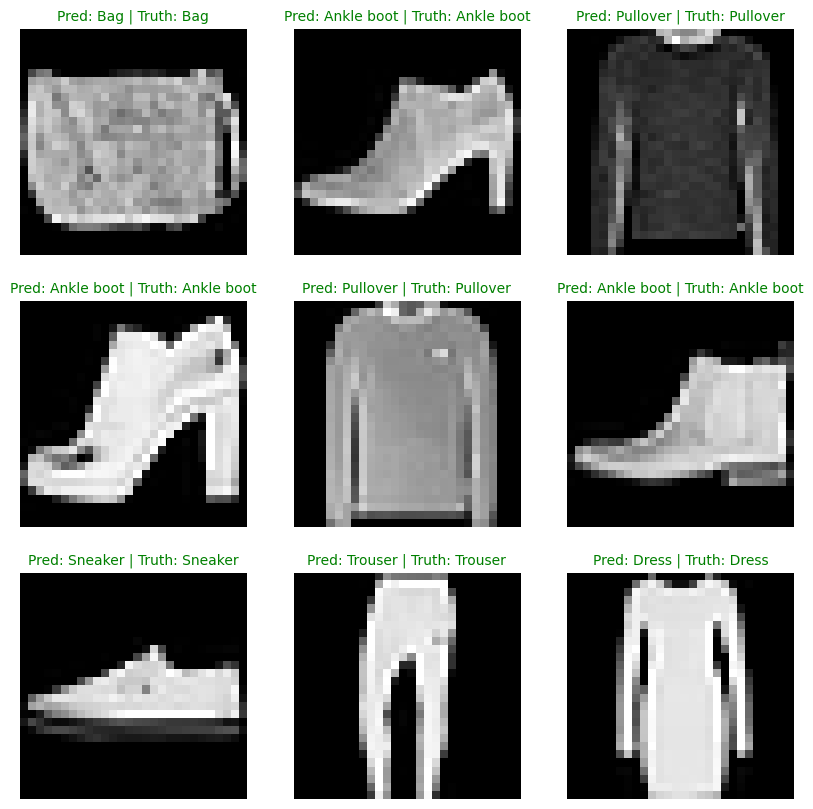

In [172]:
# plot prediction
plt.figure(figsize=(10, 10))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
  plt.subplot(nrows, ncols, i+1)

  # plot target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # get prediction label
  pred_label = class_names[pred_classes[i]]

  # get the truth label
  truth_label = class_names[test_labels[i]]

  # create title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check for equality between pred and truth and change colour of title accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);


After visualizing these predictions do you think it's more of a modelling error or a data error?
As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?
> After visulising various samples, it is easy to confuse to things to be of a similar label, for e.g., a shirt looks similar to a T-shirt/top which is why the model predicts it to be a T-shirt/top. Hence, it looks like this is a data error rather than the model failing to predict it correctly.

## 10. Making a confusion matrix for further prediction evaluation

1. make predictions with our trained model on our test dataset
2. make a confusion matrix using [`torch.metrics.ConfusionMatrix`](https://pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html)
3. Plot the confusion matrix using [`mlxtend.plotting.plot_confusion_matrix()`](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/)

In [61]:
from tqdm.auto import tqdm

# make predictions
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # send data and targets to target device
    X, y = X.to(device), y.to(device)
    # forward pass
    y_logit = model_2(X)
    # turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [62]:
len(y_pred_tensor)

10000

In [63]:
# # see if torchmetrics exists, if not, install it
# try:
#     import torchmetrics, mlxtend
#     print(f"mlxtend version: {mlxtend.__version__}")
#     assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
# except:
#     !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
#     import torchmetrics, mlxtend
#     print(f"mlxtend version: {mlxtend.__version__}")

In [64]:
import mlxtend

In [65]:
mlxtend.__version__

'0.23.4'

In [66]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [67]:
import torchmetrics

In [68]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# set up confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
confmat_tensor

tensor([[851,   1,  11,  32,   4,   1,  94,   0,   6,   0],
        [  4, 968,   2,  19,   3,   0,   2,   0,   2,   0],
        [ 16,   0, 794,  13,  99,   0,  78,   0,   0,   0],
        [ 16,   7,   9, 923,  19,   0,  25,   0,   1,   0],
        [  1,   2,  46,  44, 808,   0,  98,   0,   1,   0],
        [  0,   0,   0,   0,   0, 985,   0,  13,   2,   0],
        [159,   1,  59,  31,  59,   0, 678,   0,  13,   0],
        [  0,   0,   0,   0,   0,  30,   0, 941,   0,  29],
        [  2,   1,   2,   9,   3,   5,  20,   5, 953,   0],
        [  0,   0,   0,   0,   0,  15,   0,  34,   1, 950]])

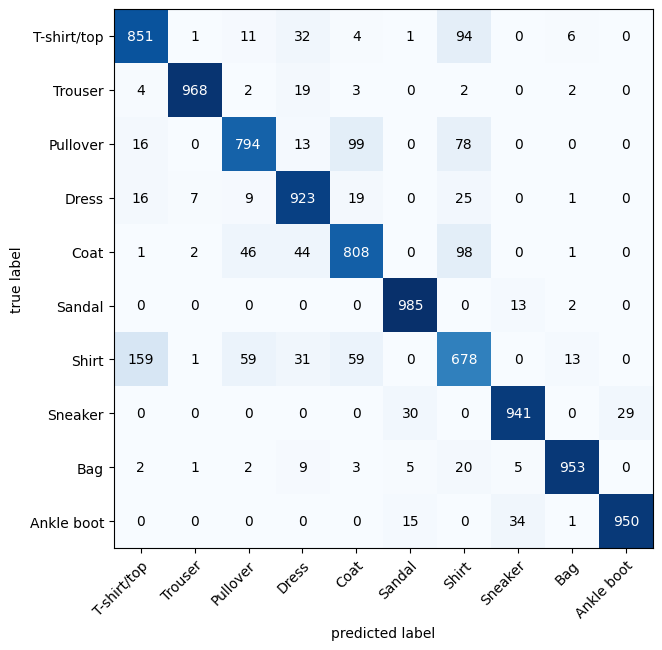

In [69]:
# plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                figsize=(10, 7),
                                cmap=plt.cm.Blues,
                                class_names=class_names)

## 11. Save and load the best model

In [70]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [71]:
# create a new instance
torch.manual_seed(42)
loaded_model = FashionMNISTModelV2(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

# load the saved state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [72]:
# evaluate
torch.manual_seed(42)
loaded_model_results = eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
loaded_model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32538628578186035,
 'model_acc': 88.52835463258786}

In [73]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32538628578186035,
 'model_acc': 88.52835463258786}

In [74]:
# check if model resulta are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_results["model_loss"]))

tensor(True)

## 12. Exercises and Extra-cirriculum

### Exercises:

https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises

1. What are 3 areas in industry where computer vision is currently being used?
> Manufacturing for quality control and automation\
> Healthcare for medical image analysis and diagnostics\
> Automotive for autonomous vehicles and driver-assistance systems
2. Search "what is overfitting in machine learning" and write down a sentence about what you find.
> Overfitting in machine learning occurs when a model learns the training data too well, including its noise and irrelevant details, leading to poor performance on new, unseen data.

3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.
> Three ways to prevent overfitting in machine learning include:
> - using more data
> - employing regularization techniques
> - implementing early stopping
>
> More data helps models generalize better, regularization adds constraints to prevent overly complex models, and early stopping halts training when performance on a validation set starts to decline.
4. Spend 20-minutes reading and clicking through the CNN Explainer website. Upload your own example image using the "upload" button and see what happens in each layer of a CNN as your image passes through it.


5. Load the torchvision.datasets.MNIST() train and test datasets.

In [75]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root="data",
                           train=True,
                           download=True,
                           transform=ToTensor())
test_data = datasets.MNIST(root="data",
                           train=False,
                           download=True,
                           transform=ToTensor())
train_data, test_data

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 346kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.15MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.11MB/s]


(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

6. Visualize at least 5 different samples of the MNIST training dataset.

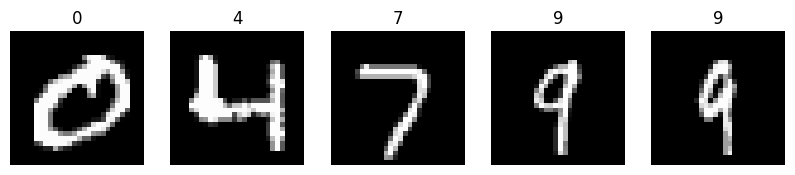

In [76]:
import matplotlib.pyplot as plt

# torch.manual_seed(42)
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(label)
  plt.axis(False)

7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [77]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


8. Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [78]:
classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [79]:
image = train_data[0][0]
image.shape

torch.Size([1, 28, 28])

In [111]:
from torch import nn

class MNISTModel(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

model = MNISTModel(input_shape=1,
                    hidden_units=10,
                    output_shape=len(classes)).to(device)
model

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [110]:
img = model(image.unsqueeze(dim=0))
img

tensor([[-0.0184,  0.0241,  0.0130,  0.0203,  0.0054, -0.0486,  0.0032, -0.0009,
          0.0282, -0.0055]], grad_fn=<AddmmBackward0>)

9. Train the model you built in exercise 8. on CPU and GPU and see how long it takes on each.

In [112]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [102]:
# CPU
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

train_time_on_cpu_start = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device="cpu")
  test_step(model=model,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device="cpu")

train_time_on_cpu_end = timer()
total_cpu_train_time = print_train_time(start=train_time_on_cpu_start,
                                        end=train_time_on_cpu_end,
                                        device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.34932 | Train acc: 88.04%
Test loss: 0.07704 | Test acc: 97.75%
Epoch: 1
-----
Train loss: 0.07391 | Train acc: 97.71%
Test loss: 0.05076 | Test acc: 98.38%
Epoch: 2
-----
Train loss: 0.05685 | Train acc: 98.23%
Test loss: 0.04488 | Test acc: 98.52%
Train time on cpu: 127.864 seconds


In [105]:
model_results = eval_model(model=model,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device="cpu")
model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModel',
 'model_loss': 0.044883664697408676,
 'model_acc': 98.5223642172524}

In [85]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [113]:
# GPU
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.manual_seed(42)

train_time_on_gpu_start = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_on_gpu_end = timer()
total_gpu_train_time = print_train_time(start=train_time_on_gpu_start,
                                        end=train_time_on_gpu_end,
                                        device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.32602 | Train acc: 88.82%
Test loss: 0.07294 | Test acc: 97.72%
Epoch: 1
-----
Train loss: 0.07195 | Train acc: 97.74%
Test loss: 0.05344 | Test acc: 98.25%
Epoch: 2
-----
Train loss: 0.05371 | Train acc: 98.30%
Test loss: 0.04848 | Test acc: 98.36%
Train time on cuda: 40.331 seconds


In [114]:
total_cpu_train_time, total_gpu_train_time

(127.86351562999971, 40.331313450999914)

In [115]:
model_results = eval_model(model=model,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModel',
 'model_loss': 0.04847532510757446,
 'model_acc': 98.3626198083067}

10. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

Text(0.5, 1.0, '7 - seven')

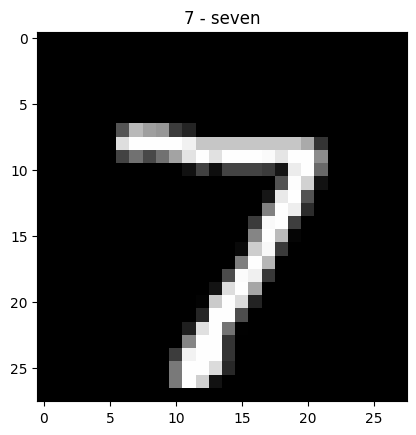

In [148]:
test_image = []
test_labels = []
for sample, label in list(test_data):
  test_image.append(sample)
  test_labels.append(label)

plt.imshow(test_image[0].squeeze(), cmap="gray")
plt.title(classes[test_labels[0]])

In [150]:
test_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [152]:
pred_prob = make_predictions(model=model,
                             data=test_image)
pred_labels = pred_prob.argmax(dim=1)
pred_labels[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

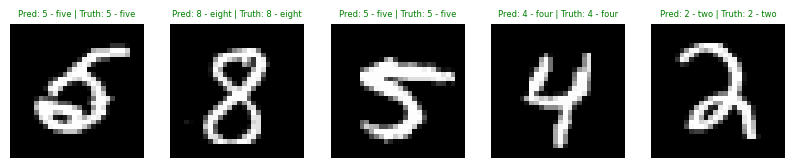

In [153]:
# torch.manual_seed(42)

plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  random_idx = torch.randint(0, len(test_image), size=[1]).item()
  img, label = test_image[random_idx], test_labels[random_idx]
  plt.imshow(img.squeeze(), cmap="gray")
  if pred_labels[random_idx] == label:
    plt.title(f"Pred: {classes[pred_labels[random_idx]]} | Truth: {classes[label]}", fontsize=6, c="g")
  else:
    plt.title(f"Pred: {classes[pred_labels[random_idx]]} | Truth: {classes[label]}", fontsize=6, c="r")
  plt.axis(False);

11. Plot a confusion matrix comparing your model's predictions to the truth labels.

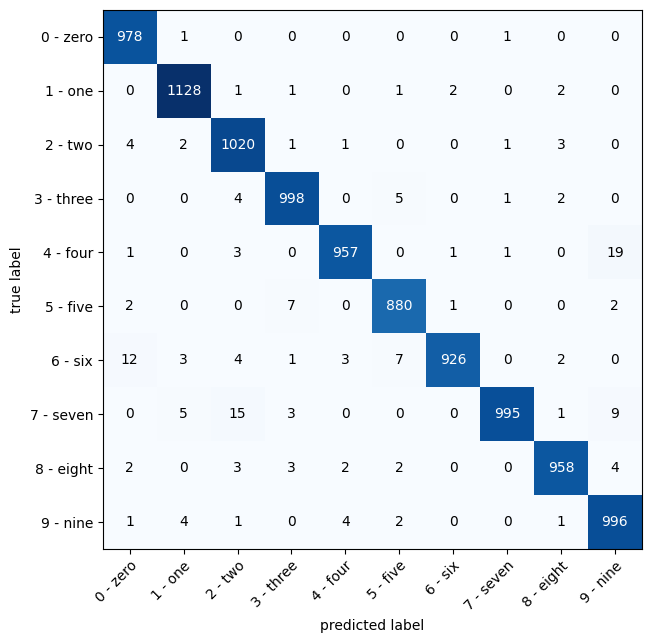

In [154]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(classes), task="multiclass")
confmat_tensor = confmat(preds=pred_labels,
                         target=torch.tensor(test_labels))

plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                      figsize=(10, 7),
                      class_names=classes);

12. Create a random tensor of shape [1, 3, 64, 64] and pass it through a nn.Conv2d() layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the kernel_size parameter goes up and down?

In [157]:
from torch import nn

torch.manual_seed(42)
random_tensor = torch.rand(size=(1, 3, 64, 64))
print(f"Tensor shape: {random_tensor.shape}")

conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1)

print(f"Tensor shape after Conv2d with kernel size = 3: {conv_layer(random_tensor).shape}")

conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=7,
                      stride=1,
                      padding=1)

print(f"Tensor shape after Conv2d with kernel size = 7: {conv_layer(random_tensor).shape}") # the size of the image decreses with the increase in kernel size as it is unable to calculate the convolution values for the edges of the image

Tensor shape: torch.Size([1, 3, 64, 64])
Tensor shape after Conv2d with kernel size = 3: torch.Size([1, 10, 64, 64])
Tensor shape after Conv2d with kernel size = 7: torch.Size([1, 10, 60, 60])


13. Use a model similar to the trained model_2 from this notebook to make predictions on the test torchvision.datasets.FashionMNIST dataset.
- Then plot some predictions where the model was wrong alongside what the label of the image should've been.
- After visualizing these predictions do you think it's more of a modelling error or a data error?
- As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
# answered below the visualisation of model_2's prediction

### Extra-cirriculum:

https://www.learnpytorch.io/03_pytorch_computer_vision/#extra-curriculum